# Slice Sampling Implementation

This Python script demonstrates the implementation of the slice sampling method, a Markov chain Monte Carlo (MCMC) technique used for sampling from probability distributions.

## Function: `slice_sampling`
The `slice_sampling` function is designed to sample from a given target probability distribution.

### Parameters:
- `iterations`: Number of samples to generate.
- `target`: The target probability density function from which samples are drawn.
- `w` : The initial width of the slice (default is 3.0).
- `start_point`: The starting point for the sampling process (default is 0.0).

### Process:
1. Initialize with a starting sample.
2. For each iteration:
   - Generate a vertical level `y` uniformly within the range of the target density at the current sample.
   - Create a horizontal interval (`x_l`, `x_r`) around the current sample.
   - Expand the interval until the target density at both ends is less than `y`.
   - Uniformly sample a new point `x_new` from this interval.
   - Accept `x_new` as the new sample if it lies within the slice (above `y`); otherwise, adjust the interval and repeat.

### Returns:
- A list of samples drawn from the target distribution.

### Generating Samples:
- Call `slice_sampling` with the standard normal PDF as the target distribution.

### Output:
- The first 10 samples from the generated slice samples are displayed.

In [83]:
import numpy as np
from scipy.stats import norm

def slice_sampling(iterations, target, w=3.0, start_point=0.0):
    samples = [start_point]
    for _ in range(iterations):
        x_curr = samples[-1]
        y = np.random.uniform(0, target(x_curr))
        x_l, x_r = x_curr - w, x_curr + w

        while y < target(x_l):
            x_l -= w
        while y < target(x_r):
            x_r += w

        x_new = np.random.uniform(x_l, x_r)
        while target(x_new) < y:
            if x_new < x_curr:
                x_l = x_new
            else:
                x_r = x_new
            x_new = np.random.uniform(x_l, x_r)

        samples.append(x_new)

    return samples

# Test slice sampling with a standard normal distribution
np.random.seed(0)  # For reproducibility
num_samples = 10000
slice_samples_normal = slice_sampling(num_samples, norm.pdf)

slice_samples_normal[:10]  # Display first 10 samples


[0.0,
 -0.4134602579689237,
 -0.8715314619354957,
 -1.2460081943593404,
 0.7934833984921932,
 1.2017507650557873,
 -0.8863930195736855,
 1.944785764517862,
 -0.8070266462998044,
 0.2880282884850929]

# Sampling from a Multimodal Distribution

The following cell extends the previous slice sampling implementation to sample from a multimodal distribution, specifically a mixture of Gaussian distributions.

## Function: `multimodal_pdf`
The `multimodal_pdf` function defines a multimodal probability density function (PDF) as a mixture of three normal distributions.

### Process:
- The function takes an input `x` and calculates the weighted sum of three Gaussian densities.
- Each Gaussian component has its own mean and standard deviation:
  1. First Gaussian: Mean = -2, Standard Deviation = 0.5, Weight = 0.3
  2. Second Gaussian: Mean = 0, Standard Deviation = 0.8, Weight = 0.4
  3. Third Gaussian: Mean = 3, Standard Deviation = 1.2, Weight = 0.3

### Returns:
- The value of the multimodal PDF at `x`.

In [84]:
# Define a multimodal distribution (e.g., a mixture of Gaussians)
def multimodal_pdf(x):
    # Mixture of three normal distributions
    return 0.3 * norm.pdf(x, -2, 0.5) + 0.4 * norm.pdf(x, 0, 0.8) + 0.3 * norm.pdf(x, 3, 1.2)

# Test slice sampling with the multimodal distribution
slice_samples_multimodal = slice_sampling(num_samples, multimodal_pdf)

slice_samples_multimodal[:10]  # Display first 10 samples from the multimodal distribution

[0.0,
 -1.0155157125052556,
 0.8399219927172048,
 2.627724439532389,
 0.7375596472066155,
 2.8861159116753106,
 -2.252249868559561,
 3.092110060210936,
 3.24197767650563,
 -2.305904208892888]

The following cell demonstrates the visualization of the results obtained from slice sampling both a standard normal distribution and a multimodal distribution. It uses `matplotlib` and `seaborn` for plotting.

## Plot 1: Standard Normal Distribution
- The first subplot (1, 2, 1) displays the histogram of the samples drawn from the standard normal distribution using `slice_sampling`.
- `sns.histplot` is used to create a histogram with a Kernel Density Estimate (KDE) overlay.
- The plot is titled 'Slice Sampling: Standard Normal Distribution' and axes are labeled accordingly.
- The histogram bars are colored blue for distinction.

## Plot 2: Multimodal Distribution
- The second subplot (1, 2, 2) shows the histogram of the samples from the multimodal distribution.
- Similar to the first plot, it includes a histogram with KDE and is colored green.
- This plot is titled 'Slice Sampling: Multimodal Distribution' with appropriate axis labels.


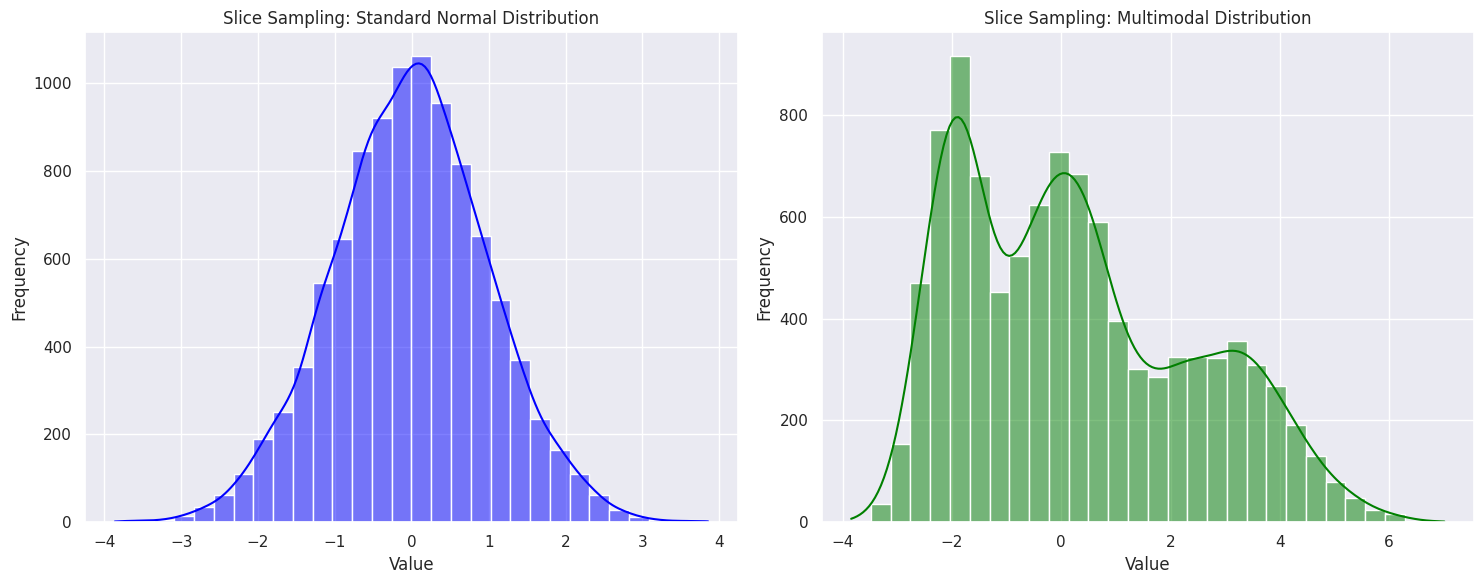

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(slice_samples_normal, bins=30, kde=True, color='blue')
plt.title('Slice Sampling: Standard Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(slice_samples_multimodal, bins=30, kde=True, color='green')
plt.title('Slice Sampling: Multimodal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Linear Regression Analysis with Slice Sampling

The following cell demonstrates the generation of synthetic data for linear regression, followed by the estimation of regression parameters using slice sampling - the inverse problem.

### Parameters:
- `n`: Number of data points.
- `slope`: The true slope of the linear model.
- `intercept`: The true intercept of the linear model.
- `noise_std`: Standard deviation of the Gaussian noise.

### Returns:
- `X`: Array of feature values.
- `y`: Array of response values, linearly dependent on `X` with added Gaussian noise.

## Function: `linear_regression_likelihood`
Defines the likelihood function for linear regression parameters.

### Parameters:
- `params`: Tuple containing slope and intercept.
- `X`: Feature values.
- `y`: Response values.
- `noise_std`: Standard deviation of the noise.

### Returns:
- The likelihood of observing the data given the parameters and noise standard deviation.

## Function: `slice_sampling_2d`
Extended implementation of slice sampling for 2-dimensional parameter space (slope and intercept).

### Parameters:
- `iterations`: Number of samples to generate.
- `target`: Target likelihood function.
- `w`: Initial width of the sampling interval.
- `start_point`: Starting point for sampling.
- `X`, `y`, `noise_std`: Data and noise information for the likelihood calculation.

### Returns:
- A list of tuples representing the sampled slope and intercept values.

## Applying 2D Slice Sampling for Linear Regression
- The `slice_sampling_2d` function is used to sample from the parameter space of the linear regression model.
- The samples for slope and intercept are extracted from the results.

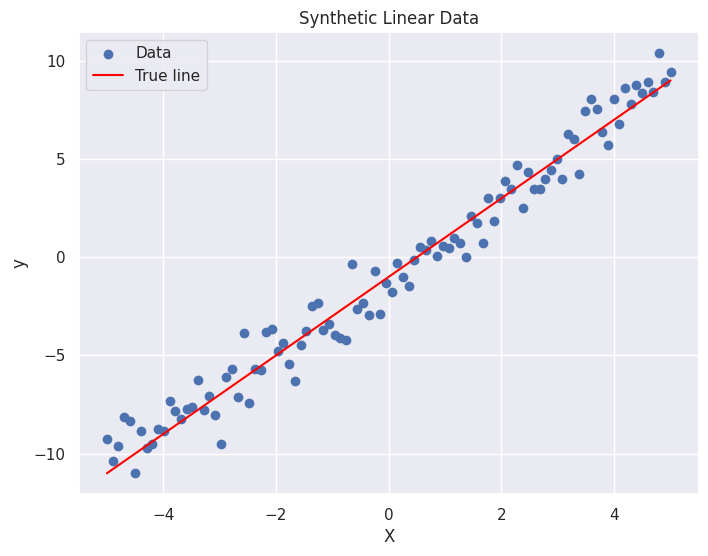

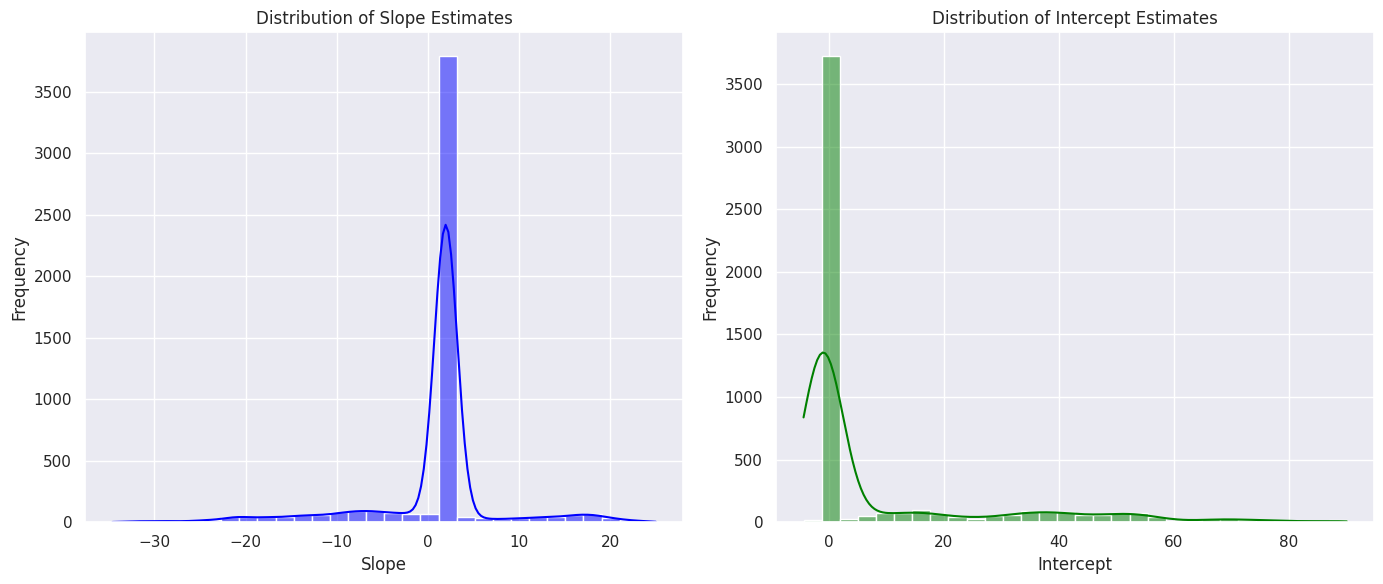

In [86]:
# Function to generate synthetic data for linear regression
def generate_linear_data(n, slope, intercept, noise_std):
    X = np.linspace(-5, 5, n)
    y = slope * X + intercept + np.random.normal(0, noise_std, n)
    return X, y

# The likelihood function for linear regression parameters
def linear_regression_likelihood(params, X, y, noise_std):
    slope, intercept = params
    y_pred = slope * X + intercept
    residuals = y - y_pred
    return np.exp(-0.5 * np.sum(residuals**2) / noise_std**2)

# Slice sampling implementation for 2D parameters
def slice_sampling_2d(iterations, target, w=3.0, start_point=(0.0, 0.0), X=None, y=None, noise_std=1.0):
    samples = [start_point]
    for _ in range(iterations):
        slope_curr, intercept_curr = samples[-1]
        y_curr = target((slope_curr, intercept_curr), X, y, noise_std)
        y_level = np.random.uniform(0, y_curr)
        slope_l, slope_r = slope_curr - w, slope_curr + w
        intercept_l, intercept_r = intercept_curr - w, intercept_curr + w
        while y_level < target((slope_l, intercept_curr), X, y, noise_std):
            slope_l -= w
        while y_level < target((slope_r, intercept_curr), X, y, noise_std):
            slope_r += w
        while y_level < target((slope_curr, intercept_l), X, y, noise_std):
            intercept_l -= w
        while y_level < target((slope_curr, intercept_r), X, y, noise_std):
            intercept_r += w
        slope_new = np.random.uniform(slope_l, slope_r)
        intercept_new = np.random.uniform(intercept_l, intercept_r)
        while target((slope_new, intercept_new), X, y, noise_std) < y_level:
            if slope_new < slope_curr:
                slope_l = slope_new
            else:
                slope_r = slope_new
            if intercept_new < intercept_curr:
                intercept_l = intercept_new
            else:
                intercept_r = intercept_new
            slope_new = np.random.uniform(slope_l, slope_r)
            intercept_new = np.random.uniform(intercept_l, intercept_r)
        samples.append((slope_new, intercept_new))
    return samples

# Generate synthetic data
np.random.seed(0)
X, y = generate_linear_data(100, slope=2.0, intercept=-1.0, noise_std=1.0)

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, 2*X - 1, color='red', label='True line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Linear Data')
plt.legend()
plt.show()

# Apply the 2D slice sampling
np.random.seed(0)
num_samples = 5000
slice_samples_2d = slice_sampling_2d(num_samples, linear_regression_likelihood, start_point=(0, 0), X=X, y=y, noise_std=1.0)

# Extract slope and intercept samples for plotting
slopes = [sample[0] for sample in slice_samples_2d]
intercepts = [sample[1] for sample in slice_samples_2d]

# Plotting the results
sns.set(style="darkgrid")
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(slopes, bins=30, kde=True, color='blue')
plt.title('Distribution of Slope Estimates')
plt.xlabel('Slope')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(intercepts, bins=30, kde=True, color='green')
plt.title('Distribution of Intercept Estimates')
plt.xlabel('Intercept')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



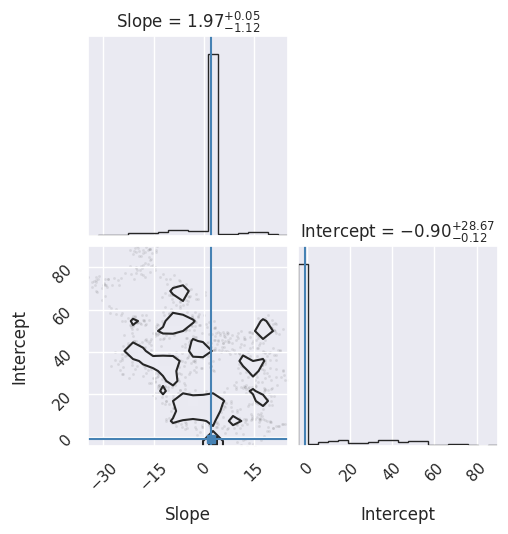

In [87]:
!pip install corner
import corner
samples_array = np.array(slice_samples_2d)

# Create a corner plot
figure = corner.corner(samples_array, labels=['Slope', 'Intercept'], truths=[2.0, -1.0], show_titles=True)
plt.show()

# As observed from the corner plots the slope and intercept estimate are very close to the true values

# Using my custom corner plot function

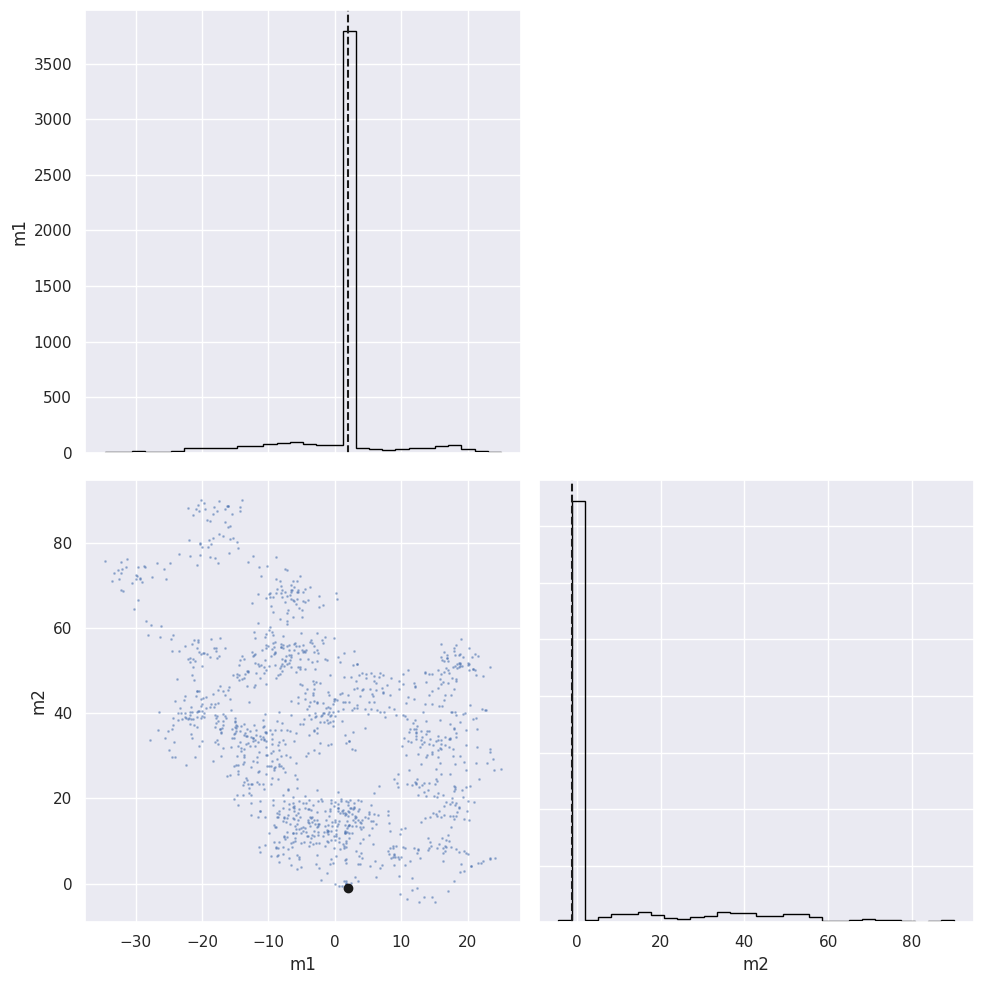

In [88]:
def corner_plot(samples, true_params=None, map_estimate=None):
    """
    Creates a corner plot with histograms on the diagonal and scatter plots off-diagonal.

    Parameters:
    samples (np.array): An array of shape (n_samples, n_params) containing MCMC samples.
    true_params (list): List containing the true parameter values.
    map_estimate (list): List containing the MAP estimate values.
    """
    n_params = samples.shape[1]
    fig, axes = plt.subplots(n_params, n_params, figsize=(10, 10))

    # Loop over all combinations of parameters for the lower triangle of the plot matrix
    for i in range(n_params):
        for j in range(n_params):
            ax = axes[i, j]
            if i == j:  # Diagonal: histograms
                ax.hist(samples[:, i], bins=30, color='black', histtype='step')
                if true_params is not None:
                    ax.axvline(true_params[i], color='k', linestyle='--')
                if map_estimate is not None:
                    ax.axvline(map_estimate[i], color='k', linestyle=':')
            elif i > j:  # Lower off-diagonal: scatter plots
                ax.scatter(samples[:, j], samples[:, i], s=1, alpha=0.4)
                if true_params is not None:
                    ax.plot(true_params[j], true_params[i], 'ko')
                if map_estimate is not None:
                    ax.plot(map_estimate[j], map_estimate[i], 'ro')
            else:
                ax.set_visible(False)

            if i == n_params - 1:
                ax.set_xlabel(f'm{j+1}')
            if j == 0:
                ax.set_ylabel(f'm{i+1}')

            if j > 0:
                ax.set_yticklabels([])
            if i < n_params - 1:
                ax.set_xticklabels([])

    plt.tight_layout()
    plt.show()

corner_plot(samples_array, true_params=[2.0, -1.0])

# Metropolis-Hastings and Gibbs Sampling for Linear Regression

The following cell showcases the application of the Metropolis-Hastings and Gibbs Sampling algorithms for estimating the parameters of a linear regression model.

## Function: `metropolis_hastings`
Implements the Metropolis-Hastings algorithm for sampling.

### Parameters:
- `iterations`: Number of samples to generate.
- `target`: The target likelihood function.
- `proposal_std`: Standard deviation for the proposal distribution.
- `start_point`: Initial point for sampling.
- `X`, `y`, `noise_std`: Data and noise information for the likelihood calculation.

### Returns:
- A list of sampled parameter values (slope and intercept).

## Function: `gibbs_sampling`
Implements the Gibbs Sampling algorithm for sampling.

### Parameters:
- `iterations`: Number of samples to generate.
- `target`: The target likelihood function.
- `start_point`: Initial point for sampling.
- `X`, `y`, `noise_std`: Data and noise information for the likelihood calculation.

### Returns:
- A list of sampled parameter values (slope and intercept).

## Sampling and Results
- Both algorithms are applied to the same linear regression problem.
- `mh_samples` and `gibbs_samples` store the samples from Metropolis-Hastings and Gibbs Sampling, respectively.
- Slope and intercept samples are extracted for both sampling methods.

<ipython-input-89-a9a02b1cbc15>:8: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_ratio = target(proposal, X, y, noise_std) / target(current, X, y, noise_std)
<ipython-input-89-a9a02b1cbc15>:8: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_ratio = target(proposal, X, y, noise_std) / target(current, X, y, noise_std)


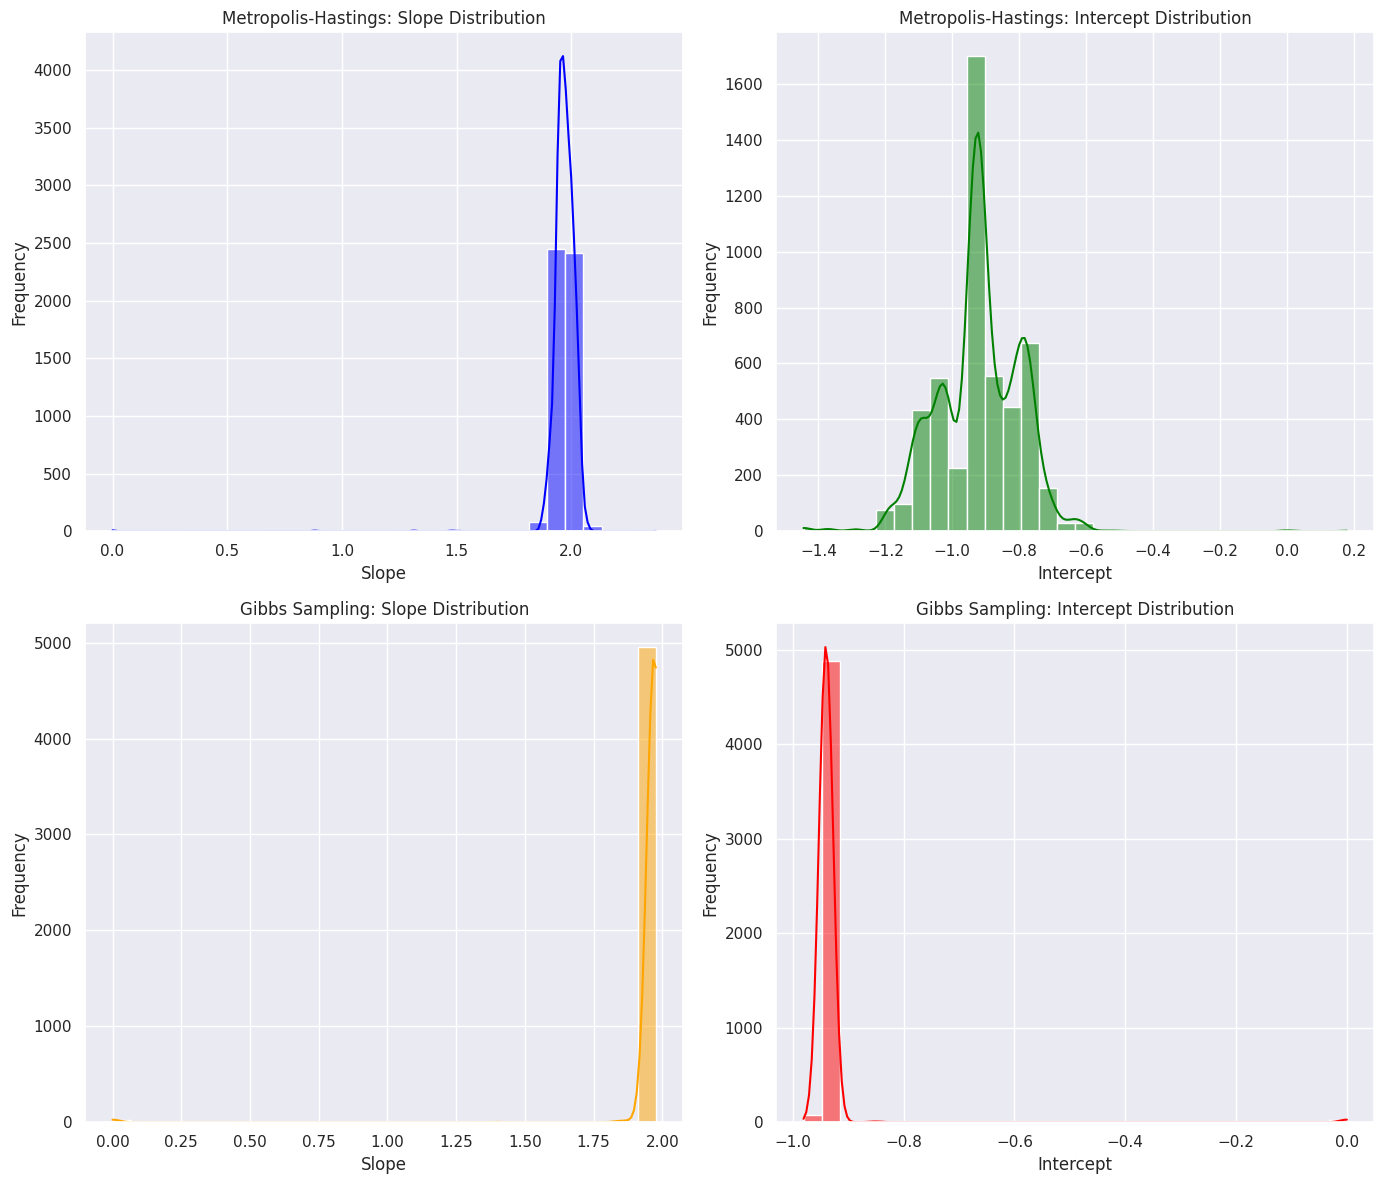

In [89]:
# Metropolis-Hastings Algorithm
def metropolis_hastings(iterations, target, proposal_std, start_point, X, y, noise_std):
    samples = [start_point]
    for _ in range(iterations):
        current = samples[-1]
        proposal = (current[0] + np.random.normal(0, proposal_std),
                    current[1] + np.random.normal(0, proposal_std))
        acceptance_ratio = target(proposal, X, y, noise_std) / target(current, X, y, noise_std)
        if np.random.rand() < acceptance_ratio:
            samples.append(proposal)
        else:
            samples.append(current)
    return samples

# Gibbs Sampling Algorithm
def gibbs_sampling(iterations, target, start_point, X, y, noise_std):
    samples = [start_point]
    for _ in range(iterations):
        slope_curr, intercept_curr = samples[-1]
        slope_new = np.random.normal(slope_curr, 0.5)
        if target((slope_new, intercept_curr), X, y, noise_std) > target((slope_curr, intercept_curr), X, y, noise_std):
            slope_curr = slope_new
        intercept_new = np.random.normal(intercept_curr, 0.5)
        if target((slope_curr, intercept_new), X, y, noise_std) > target((slope_curr, intercept_curr), X, y, noise_std):
            intercept_curr = intercept_new
        samples.append((slope_curr, intercept_curr))
    return samples

# Metropolis-Hastings sampling
mh_samples = metropolis_hastings(5000, linear_regression_likelihood, 0.5, (0, 0), X, y, 1.0)
mh_slopes = [sample[0] for sample in mh_samples]
mh_intercepts = [sample[1] for sample in mh_samples]

# Gibbs sampling
gibbs_samples = gibbs_sampling(5000, linear_regression_likelihood, (0, 0), X, y, 1.0)
gibbs_slopes = [sample[0] for sample in gibbs_samples]
gibbs_intercepts = [sample[1] for sample in gibbs_samples]

plt.figure(figsize=(14, 12))

# Metropolis-Hastings Slope Distribution
plt.subplot(2, 2, 1)
sns.histplot(mh_slopes, bins=30, kde=True, color='blue')
plt.title('Metropolis-Hastings: Slope Distribution')
plt.xlabel('Slope')
plt.ylabel('Frequency')

# Metropolis-Hastings Intercept Distribution
plt.subplot(2, 2, 2)
sns.histplot(mh_intercepts, bins=30, kde=True, color='green')
plt.title('Metropolis-Hastings: Intercept Distribution')
plt.xlabel('Intercept')
plt.ylabel('Frequency')

# Gibbs Sampling Slope Distribution
plt.subplot(2, 2, 3)
sns.histplot(gibbs_slopes, bins=30, kde=True, color='orange')
plt.title('Gibbs Sampling: Slope Distribution')
plt.xlabel('Slope')
plt.ylabel('Frequency')

# Gibbs Sampling Intercept Distribution
plt.subplot(2, 2, 4)
sns.histplot(gibbs_intercepts, bins=30, kde=True, color='red')
plt.title('Gibbs Sampling: Intercept Distribution')
plt.xlabel('Intercept')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Corner plot for these two algorithms

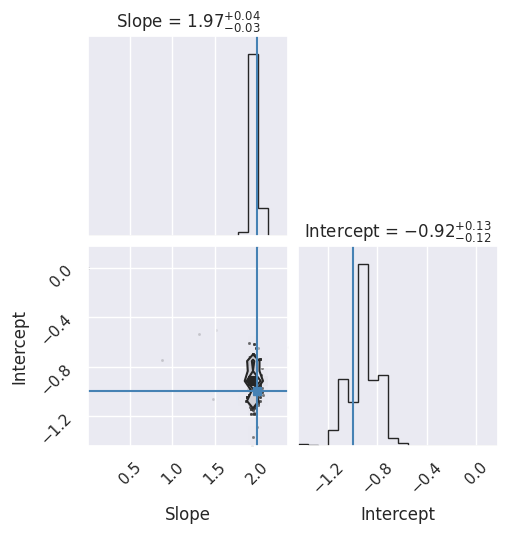

In [90]:
figure = corner.corner(np.array(mh_samples), labels=['Slope', 'Intercept'], truths=[2.0, -1.0], show_titles=True)
plt.show()

In [ ]:
figure = corner.corner(np.array(gibbs_samples), labels=['Slope', 'Intercept'], truths=[2.0, -1.0], show_titles=True)
plt.show()

# Comparative Analysis of Slice Sampling and Metropolis-Hastings

## Overview
The Python script provided is designed to compare two popular sampling methods - Slice Sampling and Metropolis-Hastings - in terms of their sampling efficiency and autocorrelation properties.

## Logic Behind the Methods
1. **Slice Sampling**: This method operates by creating a horizontal 'slice' (a range of values) that the next sample must fall into. It's designed to adaptively search for regions of non-zero probability without the need for tuning the proposal distribution, as in Metropolis-Hastings.

2. **Metropolis-Hastings**: This method generates a proposal for the next sample and accepts it based on an acceptance ratio. It requires careful tuning of the proposal distribution (in this case, a normal distribution) to balance exploration and acceptance rate.

## Why Compare These Methods?
- **Sampling Efficiency**: Understanding how quickly and effectively each method samples from a target distribution (in this case, a standard normal distribution) is crucial in statistical modeling and Bayesian inference.
- **Autocorrelation**: Lower autocorrelation is desirable as it indicates greater independence between samples, leading to more effective sampling and better representation of the target distribution.

## Implementation and Comparison
- The script runs both samplers for a set number of iterations, starting from the same initial value.
- The results are visualized through histograms and autocorrelation plots.

## Observations from the Results
1. **Histograms**: Visual comparison of the histograms of the samples provides insights into how well each method explores the target distribution.
2. **Execution Time**: By measuring the time taken for each method, we can infer the computational efficiency.
3. **Autocorrelation Plot**: This plot reveals how the autocorrelation changes with increasing lag for each method. Lower autocorrelation suggests better sampling efficiency.

## Conclusions
- The efficiency and effectiveness of each method can be inferred from the comparative analysis of the histograms, execution times, and autocorrelation plots.
- These insights are valuable in choosing the appropriate sampling method for different statistical problems, especially in Bayesian inference where the choice of sampling algorithm can significantly impact the quality of the results.

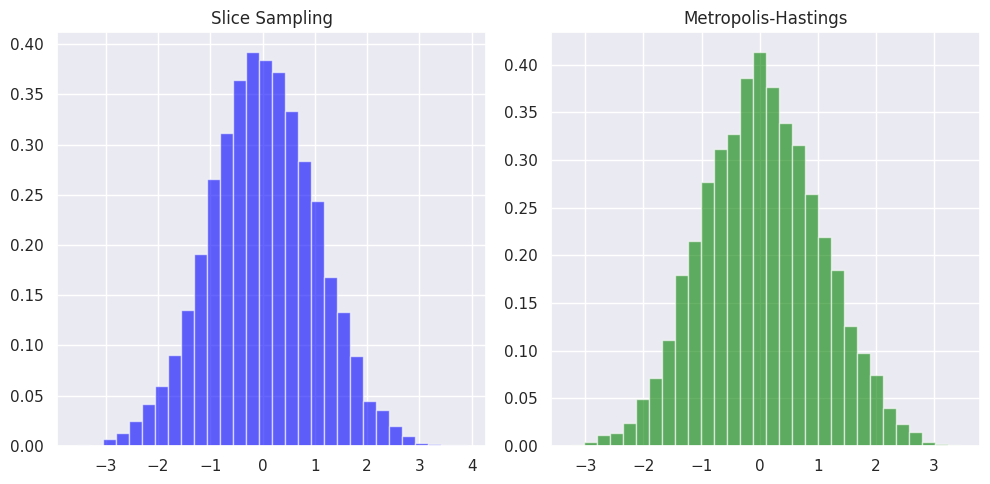

In [92]:
import scipy.stats as stats

def metropolis_hastings(iterations, initial_value):
    samples = [initial_value]
    current_sample = initial_value

    for _ in range(iterations):
        proposal = np.random.normal(current_sample, 1)
        acceptance = min(1, stats.norm.pdf(proposal) / stats.norm.pdf(current_sample))
        if np.random.uniform(0, 1) < acceptance:
            current_sample = proposal
        samples.append(current_sample)
    return samples

slice_samples = slice_sampling(10000, norm.pdf, w=1)
mh_samples = metropolis_hastings(10000, initial_value=0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist([s for s in slice_samples], bins=30, density=True, alpha=0.6, color='blue')
plt.title("Slice Sampling")

plt.subplot(1, 3, 2)
plt.hist([s for s in mh_samples], bins=30, density=True, alpha=0.6, color='green')
plt.title("Metropolis-Hastings")

plt.tight_layout()
plt.show()


In [93]:
import time

iterations = 10000

# Measuring time and running Slice Sampling
start_time = time.time()
slice_samples = slice_sampling(iterations, norm.pdf, w=1)
slice_time = time.time() - start_time

# Measuring time and running Metropolis-Hastings
start_time = time.time()
mh_samples = metropolis_hastings(iterations, initial_value=0)
mh_time = time.time() - start_time

slice_time, mh_time

(13.247004270553589, 3.151874542236328)

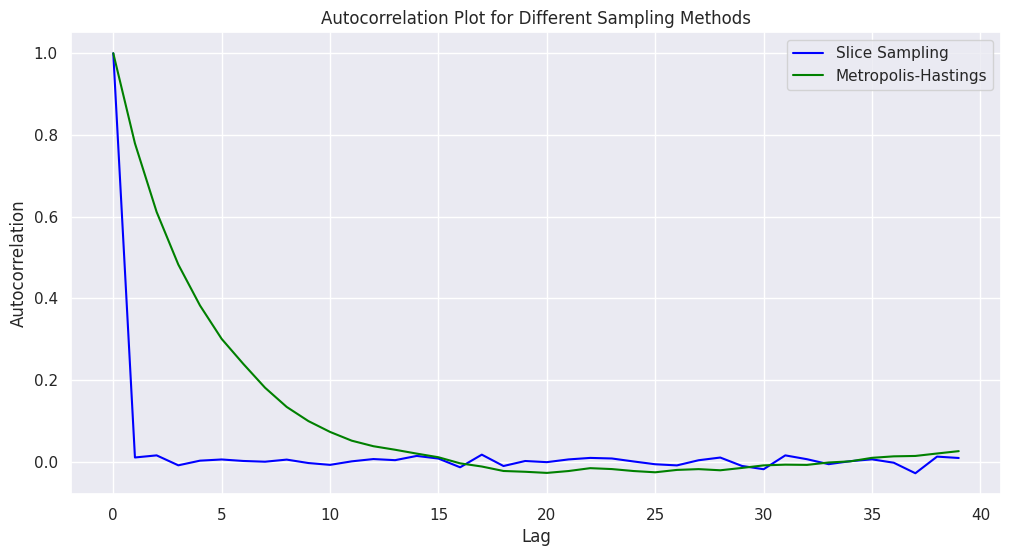

In [94]:
import pandas as pd

def autocorrelation(samples, lag=40):
    series = pd.Series(samples)
    return [series.autocorr(l) for l in range(lag)]

# Computing autocorrelation for each method
lag = 40
slice_autocorr = autocorrelation([s for s in slice_samples], lag)
mh_autocorr = autocorrelation([s for s in mh_samples], lag)


plt.figure(figsize=(12, 6))

plt.plot(slice_autocorr, label='Slice Sampling', color='blue')
plt.plot(mh_autocorr, label='Metropolis-Hastings', color='green')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for Different Sampling Methods')
plt.legend()

plt.show()


## Autocorrelation
 Indicates Independence: Faster decay means that consecutive samples become uncorrelated more quickly. This is crucial because one of the key goals in MCMC sampling is to generate independent samples from the target distribution. When samples are highly correlated, they carry similar information, reducing the efficiency of the sampling process.

 In the following cell, the code for comparing autocorrelation for these 3 algorithms for bivariate normal distribution is implemented.

 ## Results:
 From the results it's evident that:
 The autocorrelation of Gibbs sampling and slice sampling have faster decay whereas the autocorrelation plot of the Metropolis sampling has comparitively slower decay.

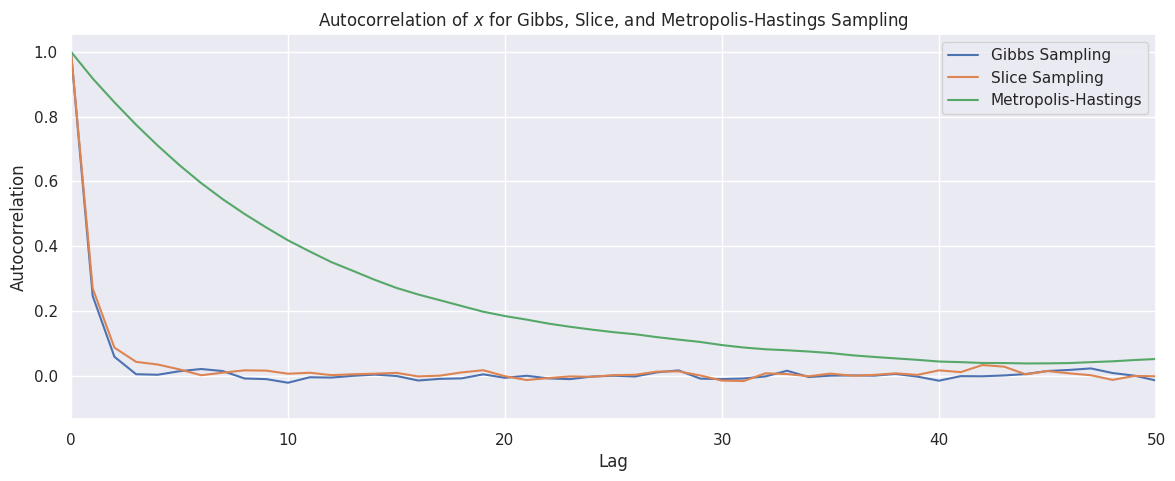

In [95]:
def gibbs_sampling_bivariate_normal(mu, sigma, rho, n_samples):
    mu1, mu2 = mu
    sigma1, sigma2 = sigma

    samples = np.zeros((n_samples, 2))
    x1, x2 = 0, 0

    for i in range(n_samples):
        mu1_cond = mu1 + rho * (sigma1/sigma2) * (x2 - mu2)
        sigma1_cond = np.sqrt((1 - rho**2) * sigma1**2)
        x1 = np.random.normal(mu1_cond, sigma1_cond)

        mu2_cond = mu2 + rho * (sigma2/sigma1) * (x1 - mu1)
        sigma2_cond = np.sqrt((1 - rho**2) * sigma2**2)
        x2 = np.random.normal(mu2_cond, sigma2_cond)

        samples[i, :] = [x1, x2]

    return samples

def slice_sampling(initial_values, mu, sigma, n_samples, w=0.5):
    x, y = initial_values
    samples = np.empty((n_samples, 2))

    for i in range(n_samples):
        y_low = y - np.random.rand() * w
        y_high = y_low + w
        while norm.pdf(y_low, mu[1] + rho * sigma[1] * (x - mu[0]), sigma[1]) > np.random.rand() * norm.pdf(y, mu[1] + rho * sigma[1] * (x - mu[0]), sigma[1]):
            y_low -= w
        while norm.pdf(y_high, mu[1] + rho * sigma[1] * (x - mu[0]), sigma[1]) > np.random.rand() * norm.pdf(y, mu[1] + rho * sigma[1] * (x - mu[0]), sigma[1]):
            y_high += w
        y = y_low + np.random.rand() * (y_high - y_low)

        x_low = x - np.random.rand() * w
        x_high = x_low + w
        while norm.pdf(x_low, mu[0] + rho * sigma[0] * (y - mu[1]), sigma[0]) > np.random.rand() * norm.pdf(x, mu[0] + rho * sigma[0] * (y - mu[1]), sigma[0]):
            x_low -= w
        while norm.pdf(x_high, mu[0] + rho * sigma[0] * (y - mu[1]), sigma[0]) > np.random.rand() * norm.pdf(x, mu[0] + rho * sigma[0] * (y - mu[1]), sigma[0]):
            x_high += w
        x = x_low + np.random.rand() * (x_high - x_low)

        samples[i, :] = [x, y]

    return samples

def metropolis_hastings(mu, sigma, rho, n_samples, proposal_width=0.5):
    x, y = 0, 0  # Start at zero for both x and y
    samples = np.empty((n_samples, 2))

    for i in range(n_samples):
        # Propose new candidate from normal distribution
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2) * proposal_width

        # Calculate the acceptance ratio
        current_prob = norm.pdf(x, mu[0], sigma[0]) * norm.pdf(y, mu[1], sigma[1])
        proposed_prob = norm.pdf(x_star, mu[0], sigma[0]) * norm.pdf(y_star, mu[1], sigma[1])
        acceptance_prob = proposed_prob / current_prob

        # Accept or reject the candidate
        if np.random.rand() < acceptance_prob:
            x, y = x_star, y_star

        samples[i, :] = [x, y]

    return samples

# Parameters for the bivariate normal distribution
mu = [0, 0]  # Means
sigma = [1, 1]  # Standard deviations
rho = 0.5  # Correlation coefficient
n_samples = 10000  # Number of samples

gibbs_samples = gibbs_sampling_bivariate_normal(mu, sigma, rho, n_samples)
slice_samples = slice_sampling([0, 0], mu, sigma, n_samples)

def plot_autocorrelation(samples, label):
    autocorr = np.correlate(samples - np.mean(samples), samples - np.mean(samples), mode='full')
    autocorr /= autocorr.max()  # Normalize
    autocorr = autocorr[autocorr.size // 2:]  # Take the second half
    lags = np.arange(len(autocorr))
    plt.plot(lags, autocorr, label=label)



metropolis_samples = metropolis_hastings(mu, sigma, rho, n_samples)

# Now let's plot the autocorrelation for all three methods together
plt.figure(figsize=(14, 5))

plot_autocorrelation(gibbs_samples[:, 0], 'Gibbs Sampling')

plot_autocorrelation(slice_samples[:, 0], 'Slice Sampling')

plot_autocorrelation(metropolis_samples[:, 0], 'Metropolis-Hastings')

plt.legend()
plt.title('Autocorrelation of $x$ for Gibbs, Slice, and Metropolis-Hastings Sampling')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.xlim(0, 50)  # Limit the lags to 50 for better comparison
plt.show()